In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data)
clinical_data=pd.read_csv(clinical_trial_data)



In [2]:
mouse_data.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


## Tumor Response to Treatment

In [3]:
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset

trial_data=mouse_data.merge(clinical_data,on='Mouse ID', how= 'outer')


# Display the data table for preview

trial_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [5]:
#create a dataframe with drug, timepoint and tumor volume
tumor_response_df=trial_data[["Drug", "Timepoint","Tumor Volume (mm3)"]]
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Stelasyn,0,45.000000
1,Stelasyn,5,47.313491
2,Stelasyn,10,47.904324
3,Stelasyn,15,48.735197
4,Stelasyn,20,51.112713


In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df=pd.DataFrame(tumor_response_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean())



In [8]:

tumor_SEM_df=trial_data[["Drug", "Timepoint","Tumor Volume (mm3)"]]

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_SEM_df=pd.DataFrame(tumor_SEM_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem())


# Preview DataFrame

tumor_SEM_df.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [10]:
#create a pivot table df with the data columns drugs,timepoints index, volume as fill


In [11]:
tumor_volume_pivot=tumor_response_df.pivot_table(columns='Drug',index="Timepoint",values="Tumor Volume (mm3)")
tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
# Generate the Plot (with Error Bars)

# Save the Figure



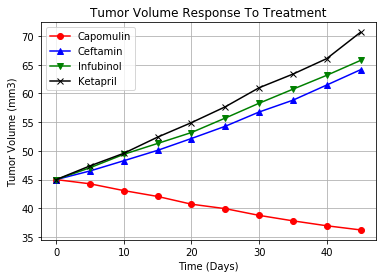

In [84]:
plt.errorbar(tumor_volume_pivot.index,tumor_volume_pivot["Capomulin"], 
            color="r",marker="o")
#plt.plot(tumor_volume_pivot.index, tumor_volume_pivot["Capomulin"],color="r")

plt.errorbar(tumor_volume_pivot.index,tumor_volume_pivot["Ceftamin"], 
            color="b",marker="^")
#plt.plot(tumor_volume_pivot.index, tumor_volume_pivot["Ceftamin"],
            #color ="b")

plt.errorbar(tumor_volume_pivot.index,tumor_volume_pivot["Infubinol"], 
            color="g",marker="v")
#plt.plot(tumor_volume_pivot.index, tumor_volume_pivot["Infubinol"],
            # color ="g")

plt.errorbar(tumor_volume_pivot.index,tumor_volume_pivot["Ketapril"], 
            color="black",marker="x")
#plt.plot(tumor_volume_pivot.index, tumor_volume_pivot["Ketapril"],
            # color ="black")
plt.title("Tumor Volume Response To Treatment")

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.grid()
plt.savefig('tumor_volume.png')
plt.show()

In [14]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [15]:
meta_response_df=trial_data[['Drug','Timepoint','Metastatic Sites']]


# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
meta_response_df=pd.DataFrame(meta_response_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean())


# Preview DataFrame
meta_response_df.head()
                              

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [89]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metaSEM_df=trial_data[["Drug", "Timepoint","Metastatic Sites"]]
# Convert to DataFrame

metaSEM_df=pd.DataFrame(metaSEM_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem())


metaSEM_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [17]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [18]:
tumor_meta_pivot=meta_response_df.pivot_table(columns='Drug',index="Timepoint",values="Metastatic Sites")
tumor_meta_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


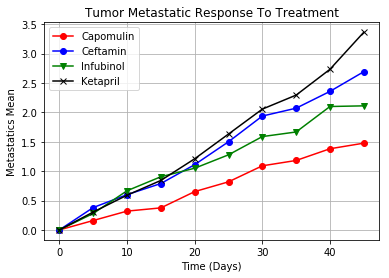

In [19]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
plt.errorbar(tumor_meta_pivot.index,tumor_meta_pivot["Capomulin"], 
            color="r",marker="o")

plt.errorbar(tumor_meta_pivot.index,tumor_meta_pivot["Ceftamin"], 
            color="b",marker="o")


plt.errorbar(tumor_meta_pivot.index,tumor_meta_pivot["Infubinol"], 
            color="g",marker="v")


plt.errorbar(tumor_meta_pivot.index,tumor_meta_pivot["Ketapril"], 
            color="black",marker="x")

plt.title("Tumor Metastatic Response To Treatment")

plt.xlabel("Time (Days)")
plt.ylabel("Metastatics Mean")
plt.legend()
plt.grid()

plt.show()

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_df = trial_data[['Drug', 'Timepoint', 'Mouse ID']]

# Set index to Drug and Timepoint
survival_df = survival_df.set_index(['Drug', 'Timepoint'])

# Convert to DataFrame

# Preview DataFrame
survival_df.head()

Mouse ID
Drug     Timepoint         
Stelasyn 0             f234
         5             f234
         10            f234
         15            f234
         20            f234

In [93]:
survival_df['Mouse Count'] = survival_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()

survival_df.head()

Mouse ID  Mouse Count
Drug     Timepoint                      
Stelasyn 0             f234           26
         5             f234           25
         10            f234           23
         15            f234           23
         20            f234           21

In [22]:
survival_pivot=survival_df.pivot_table(columns='Drug',index="Timepoint",values="Mouse Count")
survival_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [117]:

#search for a panda-y way...
#percentageSR=pd.DataFrame(((survival_pivot.iloc[-1]-survival_pivot.iloc[0])/survival_pivot.iloc[0])*100)

In [120]:
#percentage_pivot=percentageSR.pivot_table(columns='Drug',index="Timepoint")

In [86]:
#Change the raw data into percentages for the required drugs
def change_percent_capomulin(number_surviving):
    
   return(number_surviving/survival_pivot.iloc[:1]["Capomulin"])*100

capomulin_SR = pd.DataFrame(survival_pivot["Capomulin"].apply(change_percent_capomulin))

def change_percent_ceftamin(number_surviving):
    
   return(number_surviving/survival_pivot.iloc[:1]["Ceftamin"])*100

ceftamin_SR = pd.DataFrame(survival_pivot["Ceftamin"].apply(change_percent_ceftamin))


def change_percent_infubinol(number_surviving):
    
   return(number_surviving/survival_pivot.iloc[:1]["Infubinol"])*100

infubinol_SR = pd.DataFrame(survival_pivot["Infubinol"].apply(change_percent_infubinol))

def change_percent_ketapril(number_surviving):
    
   return(number_surviving/survival_pivot.iloc[:1]["Ketapril"])*100

ketapril_SR = pd.DataFrame(survival_pivot["Ketapril"].apply(change_percent_ketapril))

#merge the dataframes constructed above
survival_rate_df = pd.merge(capomulin_SR, ceftamin_SR, how='outer', on="Timepoint")
survival_rate_df=pd.merge(survival_rate_df, infubinol_SR, how='outer', on='Timepoint')
survival_rate_df=pd.merge(survival_rate_df, ketapril_SR, how='outer', on='Timepoint')

#rename columns
survival_rate_df.columns=["Capomulin Survival Rate", "Ceftamin Survival Rate", "Infubinol Survival Rate","Ketapril Survival Rate"]

survival_rate_df

,Capomulin Survival Rate,Ceftamin Survival Rate,Infubinol Survival Rate,Ketapril Survival Rate
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0
10,100.0,80.0,84.0,88.0
15,96.0,76.0,84.0,76.0
20,92.0,72.0,80.0,76.0
25,88.0,72.0,72.0,76.0
30,88.0,64.0,68.0,72.0
35,88.0,56.0,48.0,68.0
40,84.0,56.0,40.0,60.0


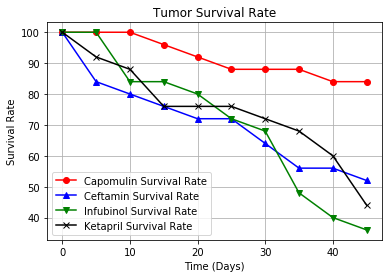

In [85]:
# Generate the Plot with survival rate percentages (with Error Bars)

plt.errorbar(survival_rate_df.index,survival_rate_df["Capomulin Survival Rate"], 
            color="r",marker="o")

plt.errorbar(survival_rate_df.index,survival_rate_df["Ceftamin Survival Rate"], 
            color="b",marker="^")


plt.errorbar(survival_rate_df.index,survival_rate_df["Infubinol Survival Rate"], 
            color="g",marker="v")

plt.errorbar(survival_rate_df.index,survival_rate_df["Ketapril Survival Rate"], 
            color="black",marker="x")

plt.title("Tumor Survival Rate")

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate")
plt.legend()
plt.grid()
# Save the Figure
plt.savefig("tumor_sr.png")
# Show the Figure
plt.show()



## Summary Bar Graph

In [96]:
tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [100]:
tumor_volume_change=  pd.DataFrame(((tumor_volume_pivot.iloc[-1]-tumor_volume_pivot.iloc[0])/tumor_volume_pivot.iloc[0]) * 100)

In [165]:
tumor_volume_change.columns=["Percent Change"]
tumor_volume_change.head()

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


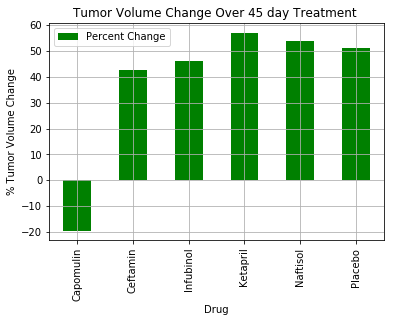

In [175]:
tumor_volume_change.iloc[:6].plot(kind="bar", color="g")
plt.grid()
plt.title("Tumor Volume Change Over 45 day Treatment ")
plt.ylabel("% Tumor Volume Change")
plt.savefig("barChart.png")
plt.show()